In [1]:
import openbabel
from openbabel import pybel
import csv,sys
import pandas as pd
import numpy as np

In [2]:
# The functional group distribution is analysed in a similar fashion as used by 
# S. Boobier, D. R. J. Hose, A. J. Blacker and B. N. Nguyen, Nat Commun, 2020, 11, 5753.
# https://doi.org/10.1038/s41467-020-19594-z
# the core code to count functional groups can be found in the ESI of the publication 

#get SMARTS and Dataset
#file with column called “FG” with list of FGs to analyse, and column called “SMARTS” of SMARTS codes
SMARTS1=pd.read_csv('/Users/jiayun/Documents/work/outliers/SMARTS.csv') 

In [3]:
SMARTS1['SMARTS']

0                                           [F,Cl,Br,I]
1                                                   [F]
2                                                  [Cl]
3                                                  [Br]
4                                                   [I]
5                                           [CX3]=[OX1]
6                                     [#6][CX3](=O)[#6]
7                                       [CX3H1](=O)[#6]
8                                [NX3][CX3](=[OX1])[#6]
9                              [#6][CX3](=O)[OX2H0][#6]
10                                     [CX3](=O)[OX2H1]
11    [$([cX3](:*):*),$([cX2+](:*):*),$([CX3]=*),$([...
12                                         [$([CX2]#C)]
13                     [$([cX3](:*):*),$([cX2+](:*):*)]
14                                          [NX1]#[CX2]
15                                 [NX3;H2,H1;!$(NC=O)]
16              [$([NX3](=O)=O),$([NX3+](=O)[O-])][!#8]
17                                          [NX2

In [4]:
#load dataset 
fps_d2 = pd.read_csv('/Users/jiayun/Documents/work/outliers/fps_xgboost_p_outliers2.csv')
m2v_xgb_d2 = pd.read_csv('/Users/jiayun/Documents/work/outliers/m2v_xgboost_p_outliers2.csv')
bert_d2 = pd.read_csv('/Users/jiayun/Documents/work/outliers/bert_p_outliers2.csv')
bert2_d2 = pd.read_csv('/Users/jiayun/Documents/work/outliers/bert2_p_outliers2.csv')

In [5]:
#fps_d2

In [6]:
#m2v_xgb_d2

In [7]:
#bert_d2

In [8]:
#bert2_d2

In [9]:
#outputfile
Output="FG_hansen_p_fps_d2.csv"

#Functional Group names 
FG_names=SMARTS1['FG']

#Get SMART CODES 
SMARTS_codes=SMARTS1['SMARTS']

#Get SMILES
smiles=fps_d2['SMILES']
fps_d2=np.array(fps_d2)
FG_list=[]

for f in range(len(fps_d2)):
    FG=[]
    #Get StdInChIKey identifier
    FG.append(fps_d2[f][5])
    #Create mol object from smiles
    mol=pybel.readstring("smi",smiles[f])
    #match all SMARTS to SMILES
    
#for each molecule
for f in range(len(fps_d2)):
    FG=[]
    #Get StdInChIKey identifier
    FG.append(fps_d2[f][5])
    #Create mol object from smiles
    mol=pybel.readstring("smi",smiles[f])
    #match all SMARTS to SMILES
    for g in SMARTS_codes:
        smarts = pybel.Smarts(g)
        if smarts.findall(mol) == []:
            FG.append("0")
        else:
            FG.append("1")
    FG_list.append(FG)

FG_names2=list(FG_names) 
FG_names2.insert(0,"StdInChIKey") 
FG_list=pd.DataFrame(data=FG_list,columns=FG_names2) 

#this can then be outputted/merged or graphed 
FG_list.to_csv(Output,index=False)    

In [10]:
FG_list

,StdInChIKey,Halides,F,Cl,Br,I,Carbonyl,Ketone,Aldehyde,Amide,...,Alcohol,Ether inc. ester,P,S,Thiol,Thioamide,Sulfonamide,H-bond donor,Acidic hydroxyl,H-bond acceptor
0,CCc1ccccc1CC,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ClC(Cl)(Cl)C=C,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Cc1ccon1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,C[S](O)(=O)=O.C=C,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,1,1
4,OCC(O)CO.OC(O)=O,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,COC(Cl)Cl,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
58,CC(=C)C(O)=O,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,1
59,ClC(=O)C(Cl)=O,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
60,FC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F...,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
FG_sum_fps_d2 = FG_list.iloc[:,1:30].astype(int).sum()
FG_sum_fps_d2_merge = (FG_sum_fps_d2.to_frame('fps_d2'))/len(fps_d2)

In [12]:
#outputfile
Output="FG_hansen_p_m2v_xgb_d2.csv"

#Functional Group names 
FG_names=SMARTS1['FG']

#Get SMART CODES 
SMARTS_codes=SMARTS1['SMARTS']

#Get SMILES
smiles=m2v_xgb_d2['SMILES']
m2v_xgb_d2=np.array(m2v_xgb_d2)
FG_list=[]

for f in range(len(m2v_xgb_d2)):
    FG=[]
    #Get StdInChIKey identifier
    FG.append(m2v_xgb_d2[f][5])
    #Create mol object from smiles
    mol=pybel.readstring("smi",smiles[f])
    #match all SMARTS to SMILES

#for each molecule
for f in range(len(m2v_xgb_d2)):
    FG=[]
    #Get StdInChIKey identifier
    FG.append(m2v_xgb_d2[f][5])
    #Create mol object from smiles
    mol=pybel.readstring("smi",smiles[f])
    #match all SMARTS to SMILES
    for g in SMARTS_codes:
        smarts = pybel.Smarts(g)
        if smarts.findall(mol) == []:
            FG.append("0")
        else:
            FG.append("1")
    FG_list.append(FG)

FG_names2=list(FG_names) 
FG_names2.insert(0,"StdInChIKey") 
FG_list=pd.DataFrame(data=FG_list,columns=FG_names2) 

#this can then be outputted/merged or graphed 
FG_list.to_csv(Output,index=False)

In [13]:
FG_list

,StdInChIKey,Halides,F,Cl,Br,I,Carbonyl,Ketone,Aldehyde,Amide,...,Alcohol,Ether inc. ester,P,S,Thiol,Thioamide,Sulfonamide,H-bond donor,Acidic hydroxyl,H-bond acceptor
0,N#Cc1occc1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,ClC(Cl)(Cl)C=C,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Cc1ccon1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,[nH]1cnc2ccccc12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,CCCCOC(=O)c1ccccc1C(=O)OCc2ccccc2,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,O=Cc1occc1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
66,CC(=C)C(O)=O,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,1
67,CO,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
68,C[S](=O)(=O)c1ccccc1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [14]:
FG_sum_m2v_xgb_d2 = FG_list.iloc[:,1:30].astype(int).sum()
FG_sum_m2v_xgb_d2_merge = (FG_sum_m2v_xgb_d2.to_frame('m2v_xgb_d2'))/len(m2v_xgb_d2)

In [15]:
#outputfile
Output="FG_hansen_p_bert_d2.csv"

#Functional Group names 
FG_names=SMARTS1['FG']

#Get SMART CODES 
SMARTS_codes=SMARTS1['SMARTS']

#Get SMILES
smiles=bert_d2['smiles']
bert_d2=np.array(bert_d2)
FG_list=[]

for f in range(len(bert_d2)):
    FG=[]
    #Get StdInChIKey identifier
    FG.append(bert_d2[f][2])
    #Create mol object from smiles
    mol=pybel.readstring("smi",smiles[f])
    #match all SMARTS to SMILES

#for each molecule
for f in range(len(bert_d2)):
    FG=[]
    #Get StdInChIKey identifier
    FG.append(bert_d2[f][2])
    #Create mol object from smiles
    mol=pybel.readstring("smi",smiles[f])
    #match all SMARTS to SMILES
    for g in SMARTS_codes:
        smarts = pybel.Smarts(g)
        if smarts.findall(mol) == []:
            FG.append("0")
        else:
            FG.append("1")
    FG_list.append(FG)

FG_names2=list(FG_names) 
FG_names2.insert(0,"StdInChIKey") 
FG_list=pd.DataFrame(data=FG_list,columns=FG_names2) 

#this can then be outputted/merged or graphed 
FG_list.to_csv(Output,index=False)

In [16]:
FG_list

,StdInChIKey,Halides,F,Cl,Br,I,Carbonyl,Ketone,Aldehyde,Amide,...,Alcohol,Ether inc. ester,P,S,Thiol,Thioamide,Sulfonamide,H-bond donor,Acidic hydroxyl,H-bond acceptor
0,SC#N,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,1
1,CC1COC(=O)O1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,NCCO,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
3,Cc1ccon1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,O=C1OCC=C1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,CC(Cl)=C(Cl)Cl,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68,OCCOCCOCCO,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,1
69,O=Cc1occc1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
70,CCCCCCCCCC(C)(O)Oc1ccccc1,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,1


In [17]:
FG_sum_bert_d2 = FG_list.iloc[:,1:30].astype(int).sum()
FG_sum_bert_d2_merge = (FG_sum_bert_d2.to_frame('bert_d2'))/len(bert_d2)

In [18]:
#outputfile
Output="FG_hansen_p_bert2_d2.csv"

#Functional Group names 
FG_names=SMARTS1['FG']

#Get SMART CODES 
SMARTS_codes=SMARTS1['SMARTS']

#Get SMILES
smiles=bert2_d2['smiles']
bert2_d2=np.array(bert2_d2)
FG_list=[]

for f in range(len(bert2_d2)):
    FG=[]
    #Get StdInChIKey identifier
    FG.append(bert2_d2[f][2])
    #Create mol object from smiles
    mol=pybel.readstring("smi",smiles[f])
    #match all SMARTS to SMILES

#for each molecule
for f in range(len(bert2_d2)):
    FG=[]
    #Get StdInChIKey identifier
    FG.append(bert2_d2[f][2])
    #Create mol object from smiles
    mol=pybel.readstring("smi",smiles[f])
    #match all SMARTS to SMILES
    for g in SMARTS_codes:
        smarts = pybel.Smarts(g)
        if smarts.findall(mol) == []:
            FG.append("0")
        else:
            FG.append("1")
    FG_list.append(FG)

FG_names2=list(FG_names) 
FG_names2.insert(0,"StdInChIKey") 
FG_list=pd.DataFrame(data=FG_list,columns=FG_names2) 

#this can then be outputted/merged or graphed 
FG_list.to_csv(Output,index=False)

In [19]:
FG_list

,StdInChIKey,Halides,F,Cl,Br,I,Carbonyl,Ketone,Aldehyde,Amide,...,Alcohol,Ether inc. ester,P,S,Thiol,Thioamide,Sulfonamide,H-bond donor,Acidic hydroxyl,H-bond acceptor
0,SC#N,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,1
1,CC1COC(=O)O1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,O=C1c2ccccc2C(=O)c3ccccc13,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,CC(=C)C(Cl)=O,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,CC1=CNC(=O)NC1=O,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,O=C(C#N)C#N,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
73,CC(Cl)=C(Cl)Cl,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74,BrC(Br)=C,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
75,Cc1ccc(c(c1[N+]([O-])=O)[N+]([O-])=O)[N+]([O-])=O,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [20]:
FG_sum_bert2_d2 = FG_list.iloc[:,1:30].astype(int).sum()
FG_sum_bert2_d2_merge = (FG_sum_bert2_d2.to_frame('bert2_d2'))/len(bert2_d2)

In [21]:
FG_sum_bert2_d2_merge

,bert2_d2
Halides,0.337662
F,0.051948
Cl,0.259740
Br,0.025974
I,0.000000
Carbonyl,0.246753
Ketone,0.090909
Aldehyde,0.000000
Amide,0.000000
Ester,0.012987


In [22]:
FG_sum_hansen = pd.read_parquet('FG_sum_hansen.parquet')

In [23]:
FG_sum_fps_d2_merge ['m2v_xgb_d2'] =  FG_sum_m2v_xgb_d2_merge
FG_sum_fps_d2_merge ['bert_d2'] =  FG_sum_bert_d2_merge
FG_sum_fps_d2_merge ['bert2_d2'] =  FG_sum_bert2_d2_merge
FG_sum_fps_d2_merge ['hansen'] =  FG_sum_hansen/1183

Text(0, 0.5, 'Average occurance/molecule')

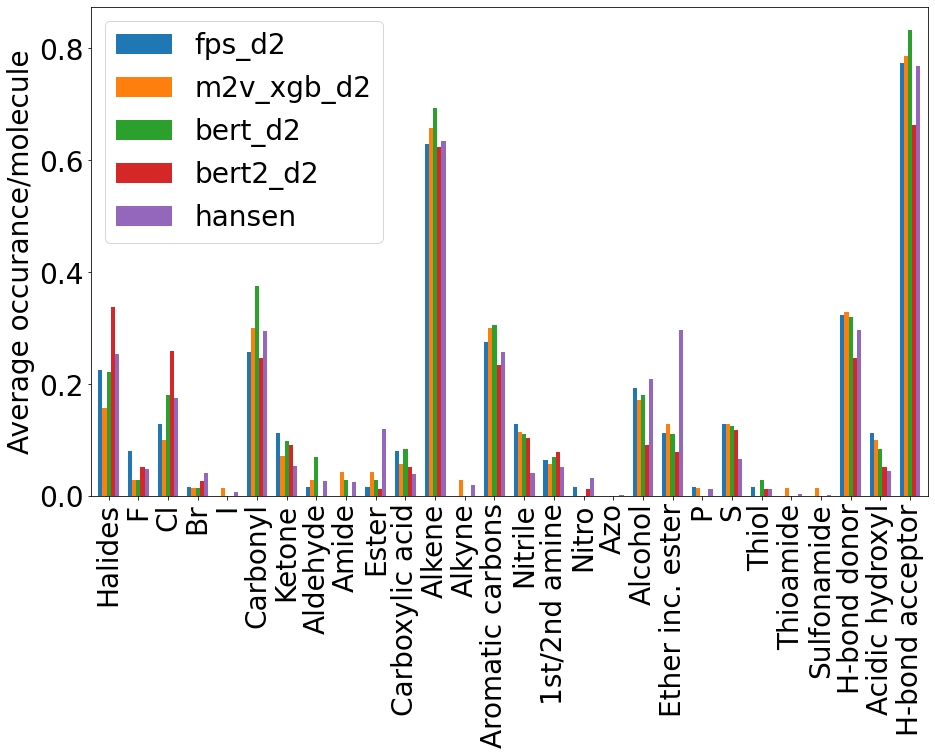

In [24]:
import matplotlib.pyplot as plt
# Set the default text font size
plt.rc('font', size=28)
ax=FG_sum_fps_d2_merge.plot.bar(figsize=(15,9), width=0.7)
ax.set_ylabel("Average occurance/molecule", size=28)

In [25]:
FG_sum_fps_d2_merge['Morgan Fps'] = FG_sum_fps_d2_merge['fps_d2']-FG_sum_fps_d2_merge['hansen']
FG_sum_fps_d2_merge['Mol2Vec/XGBoost'] = FG_sum_fps_d2_merge['m2v_xgb_d2']-FG_sum_fps_d2_merge['hansen']
FG_sum_fps_d2_merge['ChemBerta_zinc_base_v1'] = FG_sum_fps_d2_merge['bert_d2']-FG_sum_fps_d2_merge['hansen']
FG_sum_fps_d2_merge['ChemBerta_77M_MTR'] = FG_sum_fps_d2_merge['bert2_d2']-FG_sum_fps_d2_merge['hansen']

In [26]:
FG_sum_fps_d2_merge

,fps_d2,m2v_xgb_d2,bert_d2,bert2_d2,hansen,Morgan Fps,Mol2Vec/XGBoost,ChemBerta_zinc_base_v1,ChemBerta_77M_MTR
Halides,0.225806,0.157143,0.222222,0.337662,0.252747,-0.026941,-0.095604,-0.030525,0.084915
F,0.080645,0.028571,0.027778,0.051948,0.047337,0.033308,-0.018766,-0.019560,0.004611
Cl,0.129032,0.100000,0.180556,0.259740,0.174979,-0.045947,-0.074979,0.005577,0.084761
Br,0.016129,0.014286,0.013889,0.025974,0.040575,-0.024446,-0.026289,-0.026686,-0.014601
I,0.000000,0.014286,0.000000,0.000000,0.007608,-0.007608,0.006678,-0.007608,-0.007608
Carbonyl,0.258065,0.300000,0.375000,0.246753,0.294167,-0.036103,0.005833,0.080833,-0.047414
Ketone,0.112903,0.071429,0.097222,0.090909,0.054100,0.058803,0.017329,0.043122,0.036809
Aldehyde,0.016129,0.028571,0.069444,0.000000,0.027050,-0.010921,0.001522,0.042395,-0.027050
Amide,0.000000,0.042857,0.027778,0.000000,0.024514,-0.024514,0.018343,0.003264,-0.024514
Ester,0.016129,0.042857,0.027778,0.012987,0.120034,-0.103905,-0.077177,-0.092256,-0.107047


In [27]:
FG_sum_fps_d2_merge_change = FG_sum_fps_d2_merge[['Morgan Fps', 'Mol2Vec/XGBoost', 'ChemBerta_zinc_base_v1', 'ChemBerta_77M_MTR']]

Text(0, 0.5, 'Change of average occurance/molecule')

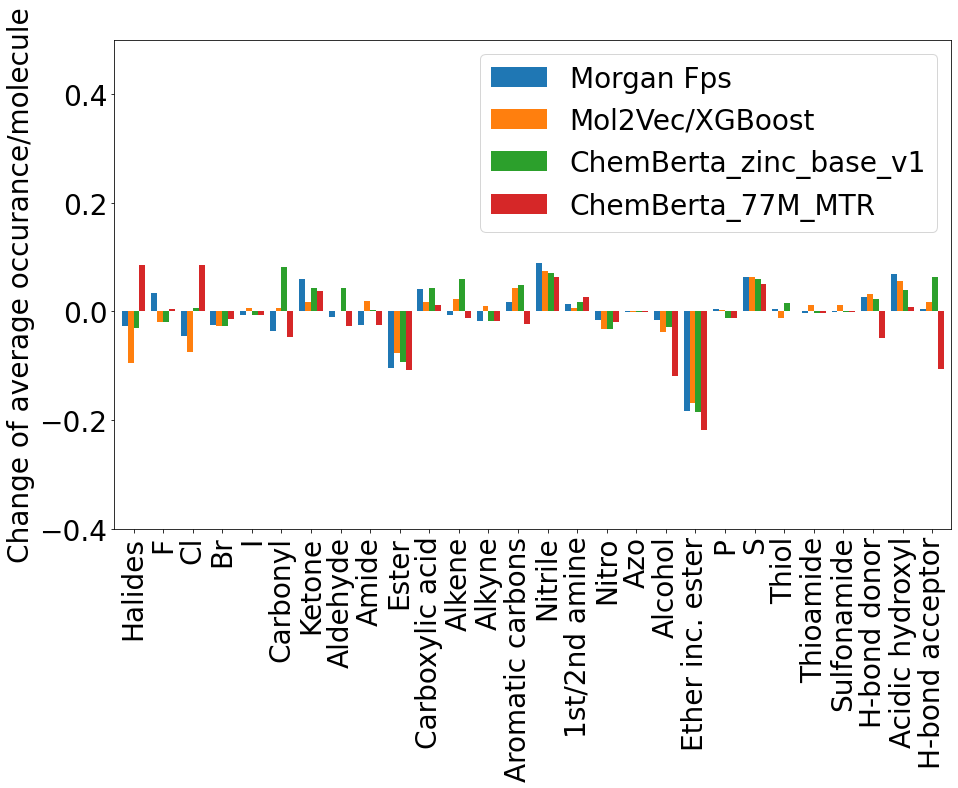

In [29]:
# Set the default text font size
plt.rc('font', size=28)
ax=FG_sum_fps_d2_merge_change.plot.bar(figsize=(15,9), ylim = (-0.4, 0.5), width=0.8)
ax.set_ylabel("Change of average occurance/molecule", size=28)